# Práctica 1. Parte 0. Ejercicio 1

In [32]:
import matplotlib.pyplot as plt
import numpy as np

Creamos variables con los valores para este ejercicio particular.

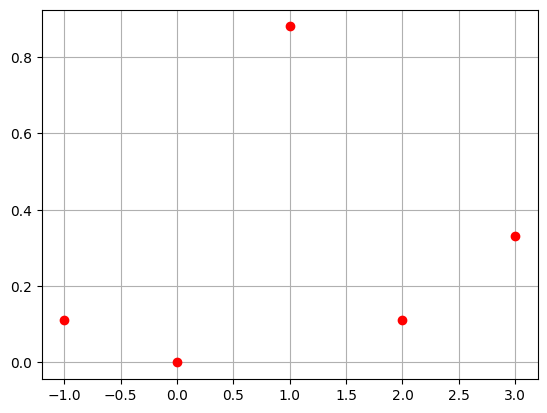

In [33]:
puntos = [[-1, 0.11], [0, 0], [1, 0.88], [2, 0.11], [3, 0.33]]
x = [p[0] for p in puntos]
y = [p[1] for p in puntos]
f1 = [1 for punto in puntos]
f2 = x
f3 = [xs**2 for xs in x]

# Representamos los puntos:
plt.plot(x, y, "ro")
plt.grid()
plt.show()

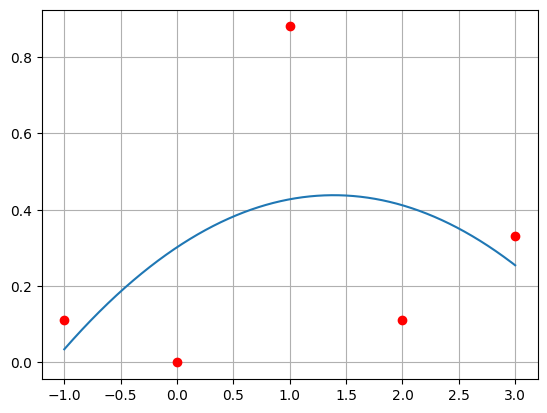

In [34]:
# Caculamos las matrices que nos proporcionan el vector a
B = np.array([f1, f2, f3]).T
BT = B.T
y = np.array(y)
BTB_1 = np.linalg.inv(np.matmul(BT, B))
BTB_1BT = np.matmul(BTB_1, BT)
a = np.matmul(BTB_1BT, y)

# Representamos la función:
x_fun = np.linspace(-1, 3, 10000)
y_fun = a[0] + a[1] * x_fun + a[2] * x_fun**2
plt.plot(x, y, "ro")
plt.grid()
plt.plot(x_fun, y_fun)
plt.show()

[0.00568947 0.09103151 0.2048209  0.09103151 0.00568947]
Error cuadrático medio:  0.07965257142857143


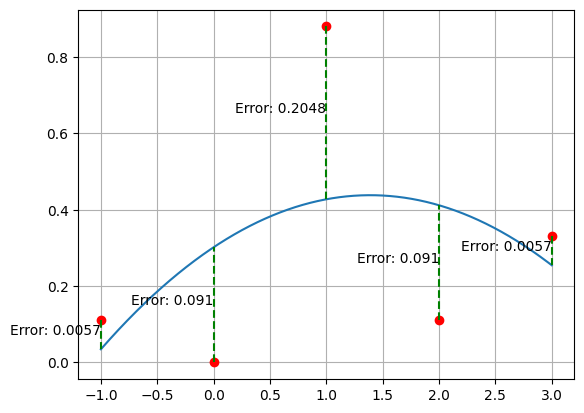

In [35]:
# Calculamos los y estimados (y_hat) para los puntos originales
y_hat = a[0] + a[1] * np.array(x) + a[2] * np.array(x)**2
errores = np.power(y_hat - y, 2)
print(errores)
suma_errores = np.sum(errores)
error_cuadratico_medio = suma_errores / len(x)
print("Error cuadrático medio: ", error_cuadratico_medio)

# Ahora dibujamos la función, los puntos y los errores
# Dibujamos las líneas verticales que representan los errores
plt.grid()
plt.plot(x_fun, y_fun, label="Función ajustada")  # La curva ajustada
plt.plot(x, y, "ro", label="Puntos originales")   # Los puntos originales
for i, punto in enumerate(puntos):
    plt.plot([x[i], x[i]], [y[i], y_hat[i]], "g--")  # Línea de error
    error = np.round(errores[i], 4)  # Redondeamos el error para mostrarlo
    plt.text(x[i], (y[i] + y_hat[i]) / 2, f'Error: {error}', ha='right')  # Etiqueta del error
plt.show()

In [36]:
# Calculamos ahora f(2,5)
f_2_5 = a[0] + a[1] * 2.5 + a[2] * 2.5**2
print("f(2.5) = ", f_2_5)

f(2.5) =  0.3508214285714285


# 2 Enunciado
Aproximar la nube de puntos {(1, 1, 1.1),(2, 2, 3.9),(3, 3, 8.7} mediante la función g(x) = a0 + a1 x utilizando
## 1. el método desarrollado en la sección anterior

Coeficientes a =  [-1.77635684e-15  1.00000000e+00]
Errores cuadráticos: [3.15544362e-30 3.15544362e-30 3.15544362e-30]
Error cuadrático medio:  3.1554436208840472e-30


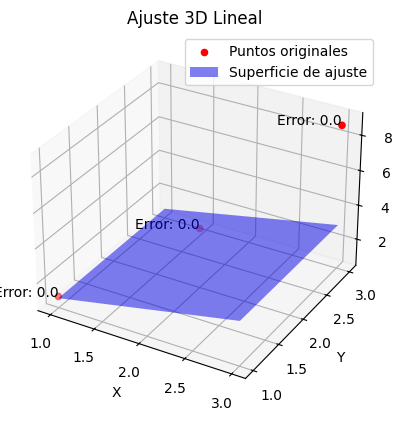

In [37]:
# Con el método anterior (matrices)
puntos = [[1, 1, 1.1], [2, 2, 3.9], [3, 3, 8.7]]
x = [p[0] for p in puntos]
y = [p[1] for p in puntos]
z = [p[2] for p in puntos]
# g(x) = a0 +a1x
f1 = [1 for punto in puntos]
f2 = x

# Caculamos las matrices que nos proporcionan el vector a
B = np.array([f1, f2]).T
BT = B.T
BTB = np.matmul(BT, B)
BTB_inv = np.linalg.inv(BTB)
BTB_inv_BT = np.matmul(BTB_inv, BT)
a = np.matmul(BTB_inv_BT, y)
print("Coeficientes a = ", a)

# Calculamos los z estimados (z_hat) para los puntos originales
y_hat = np.dot(B, a)
errores = np.square(y_hat - y)
print("Errores cuadráticos:", errores)
error_cuadratico_medio = np.mean(errores)
print("Error cuadrático medio: ", error_cuadratico_medio)

# Ahora dibujamos la función, los puntos y los errores
# Dibujamos las líneas verticales que representan los errores
# Crear la gráfica 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dibuja los puntos originales
ax.scatter(x, y, z, color='red', label='Puntos originales')

# Crea la superficie de ajuste
x_surf = np.linspace(min(x), max(x), 10)
y_surf = np.linspace(min(y), max(y), 10)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
z_surf = a[0] + a[1] * x_surf
ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.5, rstride=100, cstride=100, color='b', label='Superficie de ajuste')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Añadimos las líneas de error con sus correspondientes etiquetas
for i, punto in enumerate(puntos):
    ax.plot([x[i], x[i]], [y[i], y_hat[i]], [z[i], z[i]], "g--")  # Línea de error
    error = np.round(errores[i], 4)  # Redondeamos el error para mostrarlo
    ax.text(x[i], y[i], z[i], f'Error: {error}', ha='right')  # Etiqueta del error
    

# Etiquetas y leyenda
plt.title("Ajuste 3D Lineal")
plt.legend()
plt.show()
